**Baseline model**

**Importing libraries.**
***
I'll be using fastai library that is kind of a wrapper of keras with simplified use, i'm using it because i've tried basic neural networks models and the performance was horrible, so i pickep up this to do a fast RESnet model.

In [1]:
from fastai import *
from fastai.vision import *
from torchvision.models import * 
import warnings
warnings.filterwarnings('ignore')

import os
import matplotlib.pyplot as plt

In [2]:
path_images = 'Model/Images'

**Loading Images**
***
This function imports all files from a directory, splits them into a test and train set with a 0.2 ratio and resizes them to 224x224px since it's the ideal size to resnets. I will use no transformations for this prototype.

In [3]:
data = ImageDataBunch.from_folder(path_images, train=".", valid_pct=0.2, size=(224,224), num_workers=4).normalize(imagenet_stats)

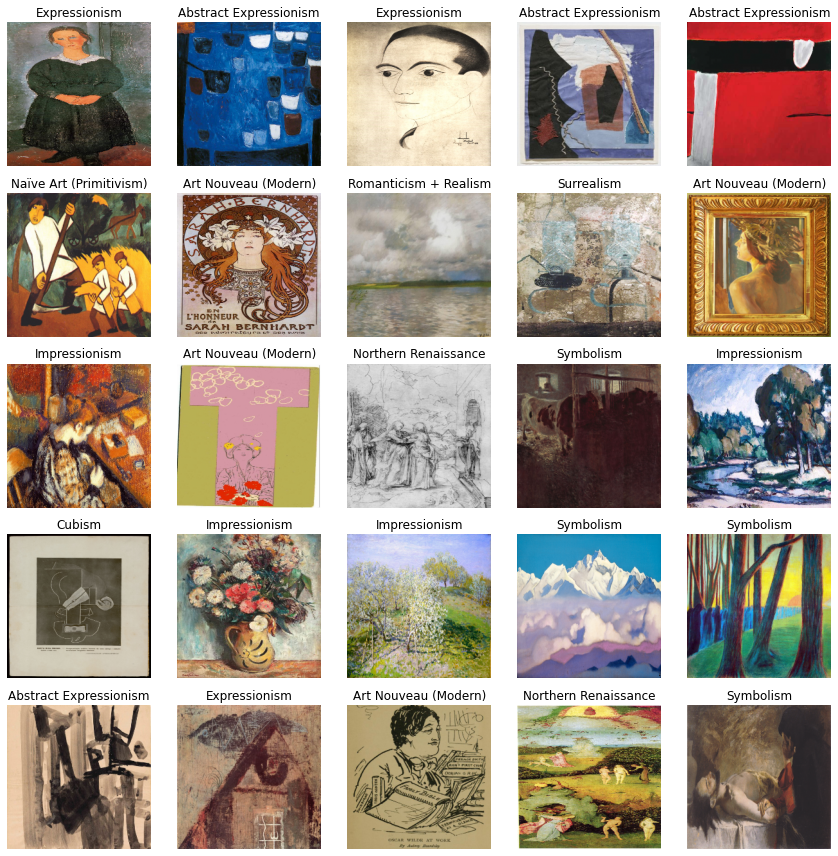

In [4]:
# showing some images on the dataset
data.show_batch(rows=5, figsize=(12,12))

In [5]:
# Number of classes identified
len(data.classes)

12

In [6]:
print(' Training dataset images: {} \n Testing dataset images: {} '.format(len(data.train_ds), len(data.valid_ds)))

 Training dataset images: 18776 
 Testing dataset images: 4694 


In [7]:
#creating the model object based on a resnet.34
model = cnn_learner(data, models.resnet34, metrics=error_rate)

In [8]:
# Fitting the model
model.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,2.125880,1.626237,0.541116,26:33
1,1.648259,1.436641,0.488283,26:29
2,1.432119,1.319371,0.448658,26:27
3,1.274627,1.262862,0.428632,26:30
4,1.157810,1.242187,0.421815,26:27


**Analysis**
***
Our performance looks fairly decent, but we can improve. so let's unfreeze the model and see where the model is performing poorly.
We can see that if the learning rate is higher than 0.0001 the loss increases a lot, so i'm going to restrict the learning rate, refit and evaluate results.

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


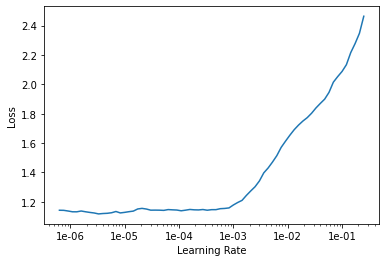

In [9]:
model.unfreeze()
model.lr_find()
model.recorder.plot()

In [10]:
model.fit_one_cycle(10, max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,1.108448,1.186937,0.402216,35:03
1,1.041627,1.178766,0.398807,34:58
2,0.859179,1.225156,0.404346,34:59
3,0.526308,1.444265,0.422454,34:53
4,0.296201,1.556922,0.393694,34:56
5,0.142014,1.640615,0.378781,34:59
6,0.062377,1.725372,0.379421,34:57
7,0.026711,1.678419,0.359608,34:57
8,0.009899,1.656718,0.352578,34:57
9,0.006728,1.660107,0.353430,34:54


**Result**
***
Performance increased a lot, so we will save the model, and apply the learning rate parameter to next models.

In [12]:
# save model
model.save('model-final')

Preparing objects to see the most problematic pictures sample and ploting the confusion matrix

In [13]:
interp = ClassificationInterpretation.from_learner(model)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

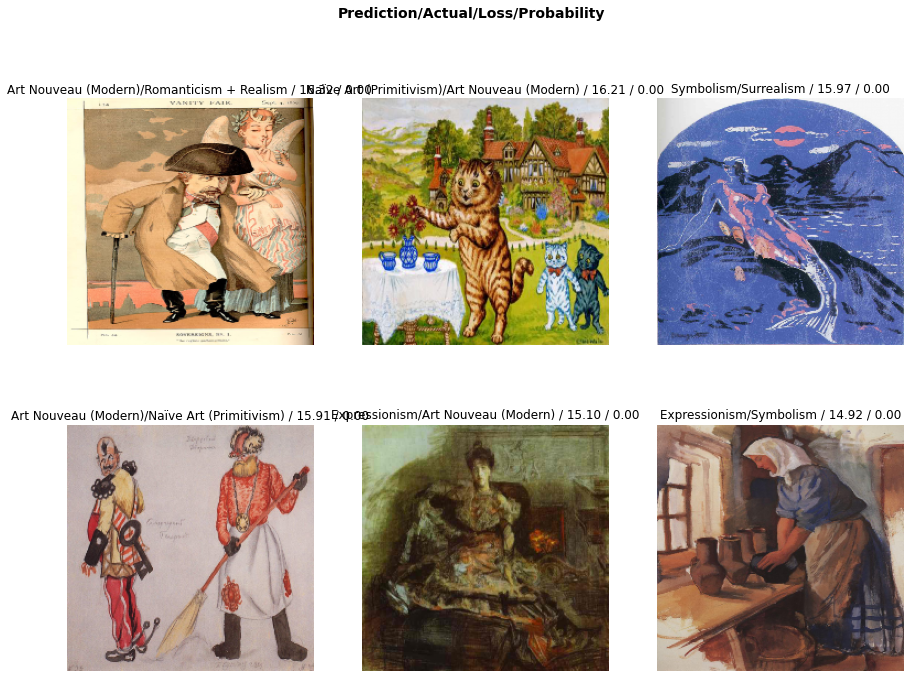

In [14]:
# look at top images that are classfied wrong
interp.plot_top_losses(6, figsize=(15,11))

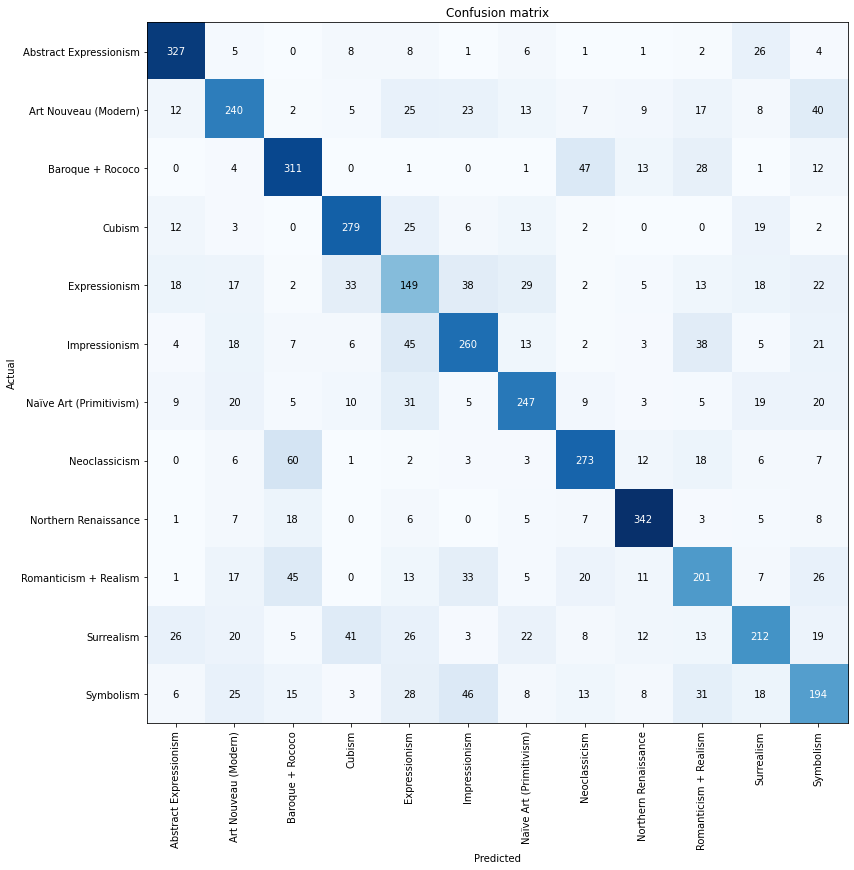

In [15]:
# plot confusion matrix. 
interp.plot_confusion_matrix(figsize=(12, 12))

**Final evaluation**
***
Seeing the correlation matrix some problems are clear, there are some movements that have problems beeing identified, and that's natural since some of them overlap in time and actually are very very similar and even art critics find it really hard to tell them appart, so for future models i will merge this classes.